In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

%matplotlib inline

# Hyperparamete

In [2]:
N = 1000
size = 5
TOL = 1e-6

# Create Data

In [3]:
def create_data(size):
    A_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if i == j:
                A_matrix[i][j] = 2*(i+1)
            if j == (i+2) or j == (i-2):
                A_matrix[i][j] = 0.5*(i+1)
            if j == (i+4) or j == (i-4):
                A_matrix[i][j] = 0.25*(i+1)    
    B_vector = np.array([np.pi for i in range(size)])
                
    return A_matrix,B_vector

In [4]:
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))

In [5]:
def draw(loss,title=None):
    ite = [i for i in range(1,len(loss)+1,1)]
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(title)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.plot(ite,loss,lw = 1,zorder = 10,label = 'norm')
    ax.grid(linestyle="--",linewidth = 0.5,zorder = 0)#pair0
    ax.legend()

In [21]:
Test_matrix = np.array(
    [
    [10,-1,2,0],
    [-1,11,-1,3],
    [2,-1,10,-1],
    [0,3,-1,8]]
)
tb_matrix = np.array(
    [6,25,-11,15]
)

# Jacobi Method

In [7]:
def Jacobin(A_matrix,B_matrix,test =False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j]*x_p[j]
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [9]:
Jacobin(Test_matrix,tb_matrix,False)[0]

array([ 1.00000014,  1.99999976, -0.99999982,  0.99999975])

1000
5
[1.52965664 0.73303829 0.11780998 0.20943951 0.0935    ]
17


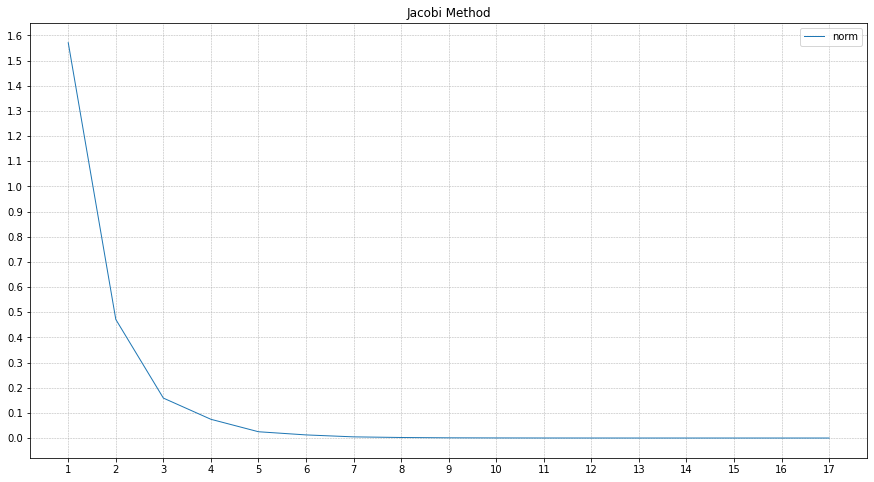

In [10]:
x,loss,k = Jacobin(create_data(size)[0],create_data(size)[1])
print(N)
print(size)
print(x)
print(k)
draw(loss,'Jacobi Method')

# Gauss-Seidel Method

In [11]:
def Gauss_Seidel(A_matrix,B_matrix,test=False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
            
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [23]:
Gauss_Seidel(Test_matrix,tb_matrix,True)[0]

[0. 0. 0. 0.]
[ 0.6         2.32727273 -0.98727273  0.87886364]
[ 1.03018182  2.03693802 -1.0144562   0.98434122]
[ 1.00658504  2.00355502 -1.00252738  0.99835095]
[ 1.00086098  2.00029825 -1.00030728  0.99984975]
[ 1.00009128  2.00002134 -1.00003115  0.9999881 ]
[ 1.00000836  2.00000117 -1.00000275  0.99999922]
[ 1.00000067  2.00000002 -1.00000021  0.99999996]


array([ 1.00000004,  1.99999999, -1.00000001,  1.        ])

1000
5
[1.52965645 0.73303829 0.11780971 0.20943951 0.09349978]
7


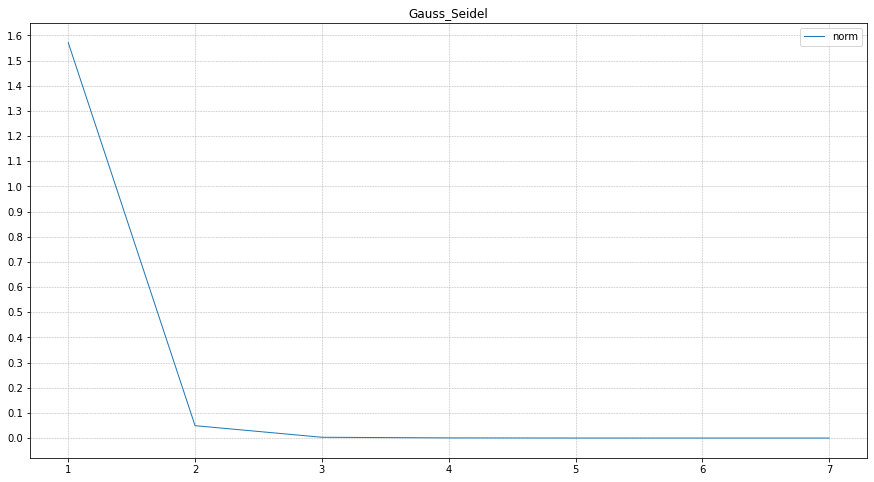

In [24]:
x,loss,k = Gauss_Seidel(create_data(size)[0],create_data(size)[1])
print(N)
print(size)
print(x)
print(k)
draw(loss,'Gauss_Seidel')

# Relaxdion Techniques  Method(SOR)

In [27]:
Test_matrix = np.array(
    [
    [4,3,0],
    [3,4,-1],
    [0,-1,4]]
)
tb_matrix = np.array(
    [24,30,-24]
)

In [18]:
def SOR(A_matrix,B_matrix,w = 1,test=False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
            
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [28]:
Gauss_Seidel(Test_matrix,tb_matrix,True)

[0. 0. 0.]
[ 6.    3.   -5.25]
[ 3.75     3.375   -5.15625]
[ 3.46875     3.609375   -5.09765625]
[ 3.29296875  3.75585938 -5.06103516]
[ 3.18310547  3.84741211 -5.03814697]
[ 3.11444092  3.90463257 -5.02384186]
[ 3.07152557  3.94039536 -5.01490116]
[ 3.04470348  3.9627471  -5.00931323]
[ 3.02793968  3.97671694 -5.00582077]
[ 3.0174623   3.98544808 -5.00363798]
[ 3.01091394  3.99090505 -5.00227374]
[ 3.00682121  3.99431566 -5.00142109]
[ 3.00426326  3.99644729 -5.00088818]
[ 3.00266454  3.99777955 -5.00055511]
[ 3.00166533  3.99861222 -5.00034694]
[ 3.00104083  3.99913264 -5.00021684]
[ 3.00065052  3.9994579  -5.00013553]
[ 3.00040658  3.99966119 -5.0000847 ]
[ 3.00025411  3.99978824 -5.00005294]
[ 3.00015882  3.99986765 -5.00003309]
[ 3.00009926  3.99991728 -5.00002068]
[ 3.00006204  3.9999483  -5.00001292]
[ 3.00003877  3.99996769 -5.00000808]
[ 3.00002423  3.99997981 -5.00000505]
[ 3.00001515  3.99998738 -5.00000316]
[ 3.00000947  3.99999211 -5.00000197]
[ 3.00000592  3.99999507 -5.

(array([ 3.00000144,  3.9999988 , -5.0000003 ]),
 [6.0,
  2.25,
  0.28125,
  0.17578125,
  0.10986328125,
  0.06866455078125,
  0.04291534423828125,
  0.02682209014892578,
  0.016763806343078613,
  0.010477378964424133,
  0.006548361852765083,
  0.004092726157978177,
  0.0025579538487363607,
  0.0015987211554602254,
  0.0009992007221626409,
  0.0006245004513516506,
  0.0003903127820947816,
  0.0002439454888092385,
  0.00015246593050610713,
  9.529120656592838e-05,
  5.955700410398279e-05,
  3.722312756471169e-05,
  2.3264454728000317e-05,
  1.454028420511122e-05,
  9.087677627750423e-06,
  5.679798517732593e-06,
  3.549874073360826e-06,
  2.218671296461139e-06,
  1.386669559622078e-06,
  8.666684747637987e-07],
 30)

In [19]:
SOR(Test_matrix,tb_matrix,w = 1,test=True)

[1. 1. 1.]
[ 5.25      3.8125   -5.046875]
[ 3.140625    3.8828125  -5.02929688]
[ 3.08789062  3.92675781 -5.01831055]
[ 3.05493164  3.95422363 -5.01144409]
[ 3.03433228  3.97138977 -5.00715256]
[ 3.02145767  3.98211861 -5.00447035]
[ 3.01341105  3.98882413 -5.00279397]
[ 3.0083819   3.99301508 -5.00174623]
[ 3.00523869  3.99563443 -5.00109139]
[ 3.00327418  3.99727152 -5.00068212]
[ 3.00204636  3.9982947  -5.00042633]
[ 3.00127898  3.99893419 -5.00026645]
[ 3.00079936  3.99933387 -5.00016653]
[ 3.0004996   3.99958367 -5.00010408]
[ 3.00031225  3.99973979 -5.00006505]
[ 3.00019516  3.99983737 -5.00004066]
[ 3.00012197  3.99989836 -5.00002541]
[ 3.00007623  3.99993647 -5.00001588]
[ 3.00004765  3.9999603  -5.00000993]
[ 3.00002978  3.99997518 -5.0000062 ]
[ 3.00001861  3.99998449 -5.00000388]
[ 3.00001163  3.99999031 -5.00000242]
[ 3.00000727  3.99999394 -5.00000151]
[ 3.00000454  3.99999621 -5.00000095]
[ 3.00000284  3.99999763 -5.00000059]
[ 3.00000177  3.99999852 -5.00000037]


# Conjugate Gradient Method